In [ ]:
import pandas as pd
import numpy as np
from openpyxl import load_workbook
from datetime import datetime
import datetime as dt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/My Drive/History and Forecast"

columns = ["Actual Date", "Business Date", "Rooms Sold", "Rooms for Sale", "Arrival Rooms", "Compliment Rooms", "House Use", "Hold", "Individual Confirm", "Individual Tentative", "Group Confirm", "Group Tentative", "Occupancy %", "Room Revenue", "ARR", "Inclusion Revenue", "Departure Rooms", "OOO Rooms", "Pax", "Individual Revenue", "Individual ARR", "Confirmed Group Revenue", "Confirmed Group ARR", "Tentative Group Revenue", "Tentative Group ARR", "Total Room Inventory"]
df = pd.DataFrame(columns=columns)

for filename in os.listdir(path):
  if filename.endswith(".xlsx"):
    filepath = os.path.join(path, filename)
    wb = load_workbook(filename=filepath, read_only=True)
    ws = wb.active

    actual_date_str = ws.cell(row=8, column=1).value
    actual_date = actual_date_str.strftime("%Y-%m-%d")

    for row in ws.iter_rows(min_row=8, max_row=ws.max_row, min_col=1, max_col=26, values_only=True):
      if isinstance(row[0], (datetime, pd.Timestamp)):
        business_date = row[0].strftime("%Y-%m-%d")
        row_dict = {"Actual Date": actual_date, "Business Date": business_date}

        # Add the data from columns C to Z to the dictionary
        for i in range(2, 26):
          row_dict[columns[i]] = row[i]

        # Append the row data to the dataframe
        df = pd.concat([df, pd.DataFrame([row_dict])], ignore_index=True)

# Print the resulting dataframe
print(df)

      Actual Date Business Date Rooms Sold Rooms for Sale Arrival Rooms  \
0      2023-02-06    2023-02-06        101             12            68   
1      2023-02-06    2023-02-07        113              3            31   
2      2023-02-06    2023-02-08        114              3            34   
3      2023-02-06    2023-02-09        115              0            36   
4      2023-02-06    2023-02-10        109              7            51   
...           ...           ...        ...            ...           ...   
20491  2023-04-03    2024-03-29         23            100             0   
20492  2023-04-03    2024-03-30         32             91             1   
20493  2023-04-03    2024-03-31          9            114             1   
20494  2023-04-03    2024-04-01          9            114             0   
20495  2023-04-03    2024-04-02          8            115             0   

      Compliment Rooms House Use Hold Individual Confirm Individual Tentative  \
0                 

In [ ]:
df['Actual Date'] = pd.to_datetime(df['Actual Date'])
df['Business Date'] = pd.to_datetime(df['Business Date'])
df

,Actual Date,Business Date,Rooms Sold,Rooms for Sale,Arrival Rooms,Compliment Rooms,House Use,Hold,Individual Confirm,Individual Tentative,...,Departure Rooms,OOO Rooms,Pax,Individual Revenue,Individual ARR,Confirmed Group Revenue,Confirmed Group ARR,Tentative Group Revenue,Tentative Group ARR,Total Room Inventory
0,2023-02-06,2023-02-06,101,12,68,2,3,0,34,26,...,29,12,181,731411.39,12190.19,587105.96,14319.66,0,0,118
1,2023-02-06,2023-02-07,113,3,31,2,2,0,34,32,...,20,10,188,824954.22,12499.31,653105.96,14513.47,0,0,120
2,2023-02-06,2023-02-08,114,3,34,2,2,0,32,40,...,33,9,193,909711.69,12634.88,594241.54,15236.96,0,0,121
3,2023-02-06,2023-02-09,115,0,36,2,2,0,26,44,...,35,11,202,865637.91,12366.26,620894.08,18814.97,0,0,119
4,2023-02-06,2023-02-10,109,7,51,2,2,0,34,41,...,57,10,213,992517.19,13233.56,440242.19,62891.74,0,0,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20491,2023-04-03,2024-03-29,23,100,0,0,0,0,2,1,...,3,7,15,0.00,0.00,274532.78,24957.53,0,0,123
20492,2023-04-03,2024-03-30,32,91,1,0,0,0,0,0,...,3,7,10,0.00,0.00,434032.78,19728.76,0,0,123
20493,2023-04-03,2024-03-31,9,114,1,0,0,0,0,1,...,2,7,10,0.00,0.00,136032.78,0.00,0,0,123
20494,2023-04-03,2024-04-01,9,114,0,0,0,0,0,1,...,0,7,10,0.00,0.00,136032.78,0.00,0,0,123


In [ ]:
# Filter the dataframe to keep only rows whose dates are on or before 19-4-2023
df = df[df['Business Date'] <= pd.Timestamp(2023, 4, 19)]

df

,Actual Date,Business Date,Rooms Sold,Rooms for Sale,Arrival Rooms,Compliment Rooms,House Use,Hold,Individual Confirm,Individual Tentative,...,Departure Rooms,OOO Rooms,Pax,Individual Revenue,Individual ARR,Confirmed Group Revenue,Confirmed Group ARR,Tentative Group Revenue,Tentative Group ARR,Total Room Inventory
0,2023-02-06,2023-02-06,101,12,68,2,3,0,34,26,...,29,12,181,731411.39,12190.19,587105.96,14319.66,0,0,118
1,2023-02-06,2023-02-07,113,3,31,2,2,0,34,32,...,20,10,188,824954.22,12499.31,653105.96,14513.47,0,0,120
2,2023-02-06,2023-02-08,114,3,34,2,2,0,32,40,...,33,9,193,909711.69,12634.88,594241.54,15236.96,0,0,121
3,2023-02-06,2023-02-09,115,0,36,2,2,0,26,44,...,35,11,202,865637.91,12366.26,620894.08,18814.97,0,0,119
4,2023-02-06,2023-02-10,109,7,51,2,2,0,34,41,...,57,10,213,992517.19,13233.56,440242.19,62891.74,0,0,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20142,2023-04-03,2023-04-15,40,81,13,0,0,0,16,16,...,24,9,81,326885.74,10215.18,136032.78,0.00,0,0,121
20143,2023-04-03,2023-04-16,47,74,19,0,0,0,14,20,...,15,9,82,358291.29,10537.98,136032.78,45344.26,0,0,121
20144,2023-04-03,2023-04-17,67,52,21,2,0,0,14,30,...,10,9,97,487677.09,11083.57,136032.78,9068.85,0,0,121
20145,2023-04-03,2023-04-18,69,49,12,3,0,0,13,28,...,15,9,91,454725.39,11090.86,136032.78,6801.64,0,0,121


In [ ]:
# import requests
# import json
# import datetime

# # API endpoint and API key
# url = "https://api.openweathermap.org/data/2.5/weather"
# api_key = "113293fa9cf43ac0f57d41d37b47ddc9"

# # Delhi's city ID on OpenWeatherMap
# city_id = 1273294

# # Function to get temperature for a specific date
# def get_temperature_for_date(date):
#     # Format the date as "YYYY-MM-DD" for the API call
#     date_str = date.strftime("%Y-%m-%d")

#     # API parameters
#     params = {"q": "Delhi", "appid": api_key, "dt": int(date.timestamp())}

#     # Make the API call
#     response = requests.get(url, params=params)

#     # Parse the JSON response
#     data = json.loads(response.text)

#     # Extract the temperature information
#     temperature = data["main"]["temp"]

#     # Convert temperature from Kelvin to Celsius
#     temperature_celsius = temperature - 273.15
#     print(temperature_celsius)

#     # Return the temperature value
#     return temperature_celsius

# # Add a new column to the DataFrame to store temperature data
# df["Temperature"] = None

# # Loop through each row of the DataFrame and get the temperature for the corresponding date
# for i, row in df.iterrows():
#     business_date = pd.to_datetime(row["Business Date"], format="%Y-%m-%d")
#     temperature = get_temperature_for_date(business_date)
#     df.at[i, "Temperature"] = temperature

In [ ]:
# import pandas as pd
# import requests

# # Define a function to get the weather conditions for a given business date and location
# def get_weather_conditions(business_date):
#   # Replace YOUR_API_KEY with your actual OpenWeatherMap API key
#   url = f'http://api.openweathermap.org/data/2.5/weather?q=Delhi,india&appid=113293fa9cf43ac0f57d41d37b47ddc9&dt='
    
#   # Convert the business date Timestamp object to a string in the format %Y-%m-%d
#   date_str = business_date.strftime('%Y-%m-%d')
    
#   # Convert the business date string to a datetime object
#   date_obj = datetime.strptime(date_str, '%Y-%m-%d')
    
#   # Convert the datetime object to a Unix timestamp and format it as a string
#   timestamp = int(date_obj.timestamp())
#   formatted_date = datetime.utcfromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S')
    
#   # Make the API request using the formatted date string
#   response = requests.get(url + formatted_date)
#   if response.status_code == 200:
#     # Parse the response JSON to extract the weather conditions
#     weather_data = response.json()
#     weather_conditions = {
#       'weather_main': weather_data['weather'][0]['main'],
#       'weather_description': weather_data['weather'][0]['description'],
#       'wind_speed': weather_data['wind']['speed'],
#       'wind_direction': weather_data['wind']['deg'],
#       'temperature': weather_data['main']['temp'],
#       'pressure': weather_data['main']['pressure'],
#       'humidity': weather_data['main']['humidity']
#     }
#     print(weather_conditions)
#     return weather_conditions
#   else:
#     print("F*CK")
#     return None

# # Add new columns for weather conditions
# df['weather_main'] = None
# df['weather_description'] = None
# df['wind_speed'] = None
# df['wind_direction'] = None
# df['temperature'] = None
# df['pressure'] = None
# df['humidity'] = None

# # Loop through each row of the dataframe
# for index, row in df.iterrows():
#     business_date = row['Business Date']
#     print(business_date)
#     weather_conditions = get_weather_conditions(business_date)
#     # Add the weather conditions to the corresponding row in the dataframe
#     if weather_conditions is not None:
#         df.at[index, 'weather_main'] = weather_conditions['weather_main']
#         df.at[index, 'weather_description'] = weather_conditions['weather_description']
#         df.at[index, 'wind_speed'] = weather_conditions['wind_speed']
#         df.at[index, 'wind_direction'] = weather_conditions['wind_direction']
#         df.at[index, 'temperature'] = weather_conditions['temperature']
#         df.at[index, 'pressure'] = weather_conditions['pressure']
#         df.at[index, 'humidity'] = weather_conditions['humidity']

# # Print the resulting dataframe
# print(df)

In [ ]:
path = '/content/drive/MyDrive/Delhi_weather_data.csv'
weather_data = pd.read_csv(path, usecols=['datetime', 'temp', 'humidity', 'precip'])
weather_data

,datetime,temp,humidity,precip
0,1/1/2023,13.4,79.8,0.0
1,1/2/2023,12.4,87.9,0.0
2,1/3/2023,11.2,85.6,0.0
3,1/4/2023,9.6,90.1,0.0
4,1/5/2023,9.7,83.0,0.0
...,...,...,...,...
104,4/15/2023,32.3,24.7,0.0
105,4/16/2023,32.9,26.4,0.0
106,4/17/2023,32.3,30.0,0.0
107,4/18/2023,33.3,27.2,0.3


In [ ]:
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'], format='%m/%d/%Y')
weather_data

,datetime,temp,humidity,precip
0,2023-01-01,13.4,79.8,0.0
1,2023-01-02,12.4,87.9,0.0
2,2023-01-03,11.2,85.6,0.0
3,2023-01-04,9.6,90.1,0.0
4,2023-01-05,9.7,83.0,0.0
...,...,...,...,...
104,2023-04-15,32.3,24.7,0.0
105,2023-04-16,32.9,26.4,0.0
106,2023-04-17,32.3,30.0,0.0
107,2023-04-18,33.3,27.2,0.3


In [ ]:
weather_data.rename(columns={'temp': 'Temperature', 'humidity': 'Humidity', 'precip': 'Precipitation'}, inplace=True)

# merge the 'df' and 'weather_data' dataframes based on the 'Business Date' and 'date' columns
merged_df = pd.merge(df, weather_data, left_on='Business Date', right_on='datetime')

# drop the 'date' column from the merged dataframe
merged_df.drop('datetime', axis=1, inplace=True)

# print the updated dataframe
merged_df

,Actual Date,Business Date,Rooms Sold,Rooms for Sale,Arrival Rooms,Compliment Rooms,House Use,Hold,Individual Confirm,Individual Tentative,...,Individual Revenue,Individual ARR,Confirmed Group Revenue,Confirmed Group ARR,Tentative Group Revenue,Tentative Group ARR,Total Room Inventory,Temperature,Humidity,Precipitation
0,2023-02-06,2023-02-06,101,12,68,2,3,0,34,26,...,731411.39,12190.19,587105.96,14319.66,0,0,118,19.7,65.2,0.0
1,2023-02-06,2023-02-07,113,3,31,2,2,0,34,32,...,824954.22,12499.31,653105.96,14513.47,0,0,120,18.4,70.0,0.0
2,2023-02-06,2023-02-08,114,3,34,2,2,0,32,40,...,909711.69,12634.88,594241.54,15236.96,0,0,121,16.9,60.1,0.0
3,2023-02-08,2023-02-08,115,2,31,2,2,0,61,11,...,878984.83,12208.12,594241.54,14493.70,0,0,121,16.9,60.1,0.0
4,2023-02-06,2023-02-09,115,0,36,2,2,0,26,44,...,865637.91,12366.26,620894.08,18814.97,0,0,119,19.3,60.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2488,2023-03-30,2023-04-19,59,60,12,1,1,0,13,22,...,378404.60,10811.56,136032.78,8001.93,0,0,121,31.3,32.8,0.3
2489,2023-03-31,2023-04-19,62,57,13,2,0,0,12,26,...,413324.60,10876.96,136032.78,8001.93,0,0,121,31.3,32.8,0.3
2490,2023-04-01,2023-04-19,63,55,14,2,0,0,12,27,...,426657.93,10939.95,136032.78,8001.93,0,0,120,31.3,32.8,0.3
2491,2023-04-02,2023-04-19,63,55,14,2,0,0,13,26,...,426657.93,10939.95,136032.78,8001.93,0,0,120,31.3,32.8,0.3


In [ ]:
X = merged_df[['Actual Date', 'Business Date', 'Temperature', 'Humidity', 'Precipitation']]
y = merged_df['Rooms Sold']

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into train, validation and test sets in 70-20-10 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Define the preprocessing steps for the numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Combine the preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['Temperature', 'Humidity', 'Precipitation']),
        ('cat', categorical_transformer, ['Actual Date', 'Business Date'])
    ])

# Transform the data using the preprocessor
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Define the ML model and set its hyperparameters
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the ML model using k-fold cross-validation
scores = cross_val_score(rf, X_train_preprocessed, y_train, cv=5, scoring='neg_mean_absolute_error')

In [ ]:
from sklearn.metrics import mean_absolute_error

# Train the ML model on the entire training set
rf.fit(X_train_preprocessed, y_train)

# Predict the target variable on the validation set
y_pred = rf.predict(X_val_preprocessed)

# Evaluate the performance of the ML model on the validation set
mae = mean_absolute_error(y_val, y_pred)
print(mae)

9.324053452115812


In [ ]:
# Transform the test data using the preprocessor
X_test_preprocessed = preprocessor.transform(X_test)

# Predict the target variable on the test set
y_pred_test = rf.predict(X_test_preprocessed)

# Evaluate the performance of the ML

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred_test)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred_test)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Mean Absolute Error: 8.70288
Mean Squared Error: 163.89798480000002
Root Mean Squared Error: 12.802264830880512
R-squared Score: 0.8694582665865801


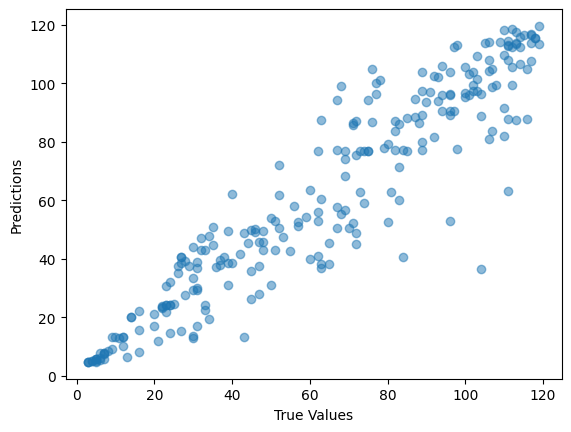

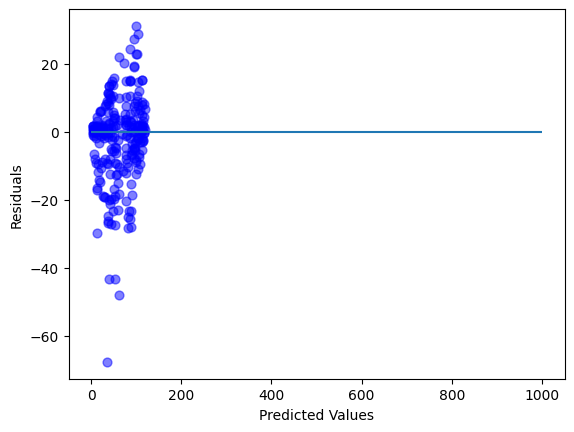

In [ ]:
import matplotlib.pyplot as plt

# Plot predicted values against true values for test set
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

# Plot residuals for test set
plt.scatter(y_pred_test, y_pred_test - y_test, c='b', s=40, alpha=0.5)
plt.hlines(y=0, xmin=0, xmax=1000)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [ ]:
!pip install mlforecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.7 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade mlforecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from mlforecast.model_selection import PurgedWalkForwardCV
from mlforecast.preprocessing import TSFeatureExtractor
from mlforecast.utils import load_data
from mlforecast.metrics import mae, mse, rmse, r2
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Define the feature extractor
features = ['Actual Date', 'Business Date', 'Temperature', 'Humidity', 'Precipitation']
extractor = TSFeatureExtractor(features=features)

# Define the pipeline
preprocessor = make_column_transformer((StandardScaler(), ['Temperature', 'Humidity', 'Precipitation']),
                                        (OneHotEncoder(handle_unknown='ignore'), ['Business Date']),
                                        remainder='passthrough')
model = LinearRegression()

pipeline = make_pipeline(extractor, preprocessor, model)

# Define the cross-validation strategy
cv = PurgedWalkForwardCV(n_splits=10, min_train_size=30, window_size=30, delay=1)

# Fit the model and predict on the test set
y_true, y_pred = [], []

for train_idx, test_idx in cv.split(merged_df):
    X_train, y_train = df.iloc[train_idx], df['Rooms Sold'].iloc[train_idx]
    X_test, y_test = df.iloc[test_idx], df['Rooms Sold'].iloc[test_idx]
    
    pipeline.fit(X_train, y_train)
    y_pred_test = pipeline.predict(X_test)
    
    y_true.extend(y_test.tolist())
    y_pred.extend(y_pred_test.tolist())

# Evaluate the model
print(f"Mean Absolute Error: {mae(y_true, y_pred)}")
print(f"Mean Squared Error: {mse(y_true, y_pred)}")
print(f"Root Mean Squared Error: {rmse(y_true, y_pred)}")
print(f"R-squared Score: {r2(y_true, y_pred)}")

ModuleNotFoundError: ignored